In [14]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

import test_objective as TO
import test_subjective as TS
import plotting

## Pruebas objetivas


En esta sección se busca analizar como varia el algorítmo antes distintos casos de interes y bajo distintos parámetros. COmo el procedimiento de TSM con phase vocoder necesita de estimar la frecuencia instantánea, se necesita de tamaños de ventana realtivamente alto para que la resolución frecuencial sea la adecuada. En los diccionarios se deja constancia de los distintos tipos de configuración probadas bajo estos test.

In [15]:
alpha = 2.5
cfg1 = {"N": 8192, "Hs": 8192//4, "alpha": alpha, "fs": 22050}
cfg2 = {"N": 8192, "Hs": 8192//2, "alpha": alpha, "fs": 22050}
cfg3 = {"N": 4096, "Hs": 4096//2, "alpha": alpha, "fs": 22050}
cfg4 = {"N": 4096, "Hs": 4096//4, "alpha": alpha, "fs": 22050}
cfg5 = {"N": 4096, "Hs": 4096//6, "alpha": alpha, "fs": 22050}
cfg6 = {"N": 2048, "Hs": 2048//4, "alpha": alpha, "fs": 22050}
cfg7 = {"N": 2048, "Hs": 2048//6, "alpha": alpha, "fs": 22050}
cfg8 = {"N": 1024, "Hs": 1024//2, "alpha": alpha, "fs": 22050}
cfg_ola = {"N": 1024, "Hs": 1024//2, "alpha": alpha}

El primer test compara señales ideales respeto a un caso base de interes particular para cada algorítmo. En el primer test se usará una señal senoidal. Primero se muestra un ejemplo con una frequencia arbitraria y luego se realiza el mismo analisis para cada frequencia.

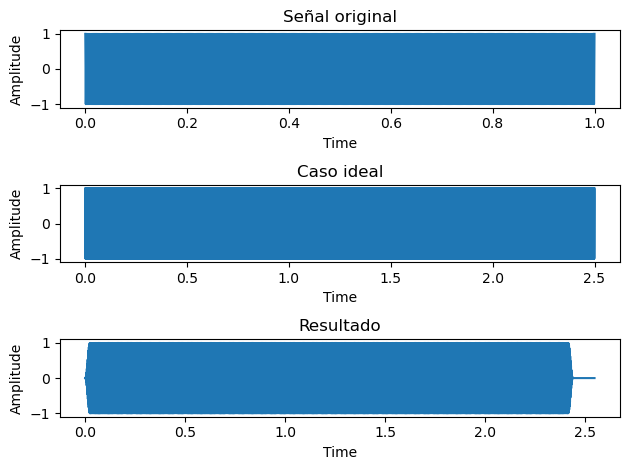

In [16]:
f_analysis = 500
config = cfg8
algorithm = "OLA"
x_base, x_ideal, x_result = TO.test_ideal_signal(algo=algorithm, f0=f_analysis, plot=True, audio_save=False, return_audios=True, **config)

In [17]:
Audio(x_ideal, rate=22050)

In [18]:
Audio(x_result, rate=22050)

Valor final promedio 0.7561626441327459


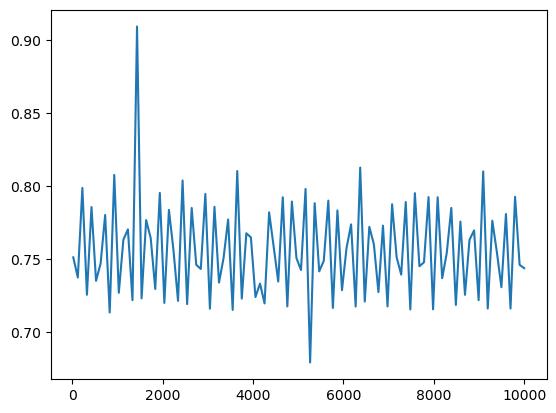

In [19]:
res = 100
freqs = np.linspace(20,10000, res)  #Frecuencias a analizar

sim_value = []
gain_dif_value = []

for f in freqs:
    sim, gain = TO.test_ideal_signal(algo=algorithm, f0=f, plot=False, audio_save=False, return_audios=False, **config)
    sim_value.append(sim)
    gain_dif_value.append(gain)

plt.plot(freqs, sim_value)
print("Valor final promedio", np.sum(sim_value)/res)

In [20]:
print("Freq de mayor similitud: ", freqs[np.argmin(sim_value)])
print("Freq de menor similitud: ", freqs[np.argmax(sim_value)])

Freq de mayor similitud:  5262.020202020201
Freq de menor similitud:  1431.3131313131312


Gain value prom:  5.514412684963998e-05


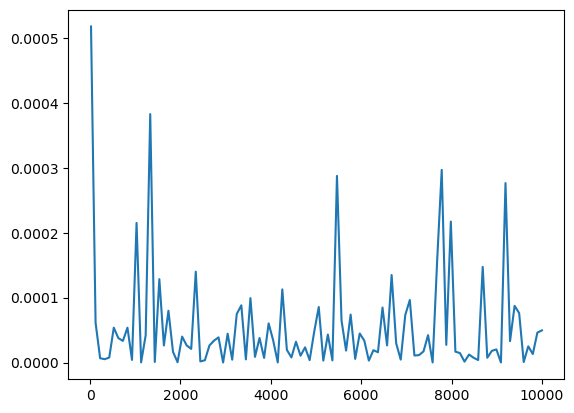

In [21]:
plt.plot(freqs, gain_dif_value)
print("Gain value prom: ", np.sum(gain_dif_value)/res)

A continuación, se hará una test con una señal que fluctua rapidamente en frecuencia. 

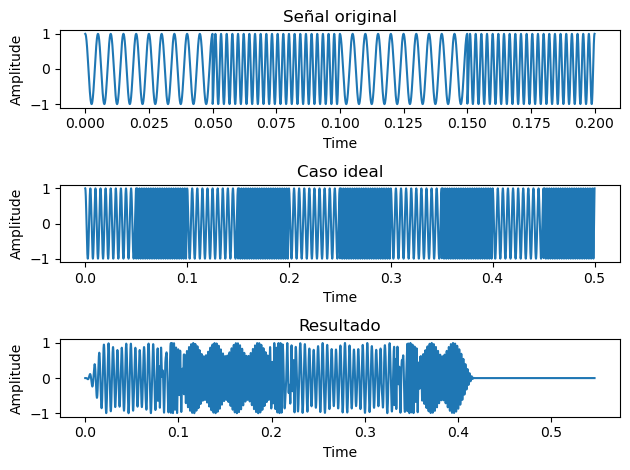

In [22]:
x_base, x_ideal, x_result = TO.test_freq_change_signal(algo=algorithm, plot=True, audio_save=False, return_audios=True, **config)

In [23]:
Audio(x_ideal, rate=22050)

In [24]:
Audio(x_result, rate=22050)

In [25]:
rta = TO.test_freq_change_signal(algo=algorithm, plot=False, audio_save=False, return_audios=False, **config)

## Pruebas Subjetivas

En esta sección se evaluarán, diferentes configuraciones del algorítmo aplicadas a una señal real. 

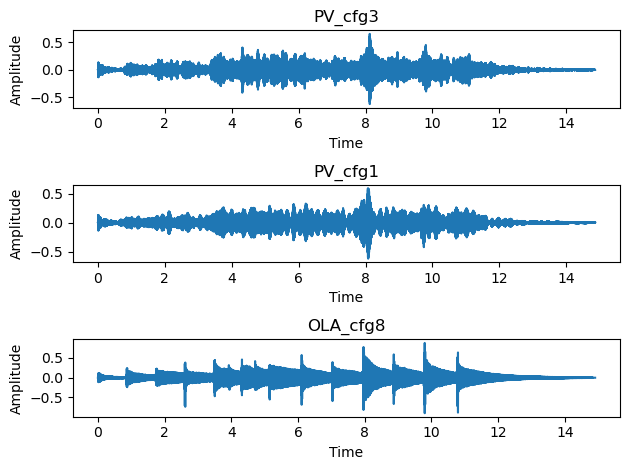

In [26]:
path_audio = "..\\audios\\sharp_bells.wav"
test = [["PV", cfg3, "PV_cfg3"], ["PV", cfg2, "PV_cfg1"], ["OLA", cfg_ola, "OLA_cfg8"]]

x1, x2, x3 = TS.compare_algorithms(path_audio, test, plot=True, save_audios=False, return_audios=True)

In [ ]:
#Y aca poner para escuchar cada audio o poner true en save audios y escuchas los wavs directamente